## Observations and Insights 

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview
mouse_df1 = pd.DataFrame(mouse_metadata, columns=["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)"])
mouse_df2 = pd.DataFrame(study_results, columns=["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"])

merge_df = pd.merge(mouse_df1, mouse_df2, on="Mouse ID")
merge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [92]:
# Checking the number of mice.
(merge_df['Mouse ID']).describe()

count     1893
unique     249
top       g989
freq        13
Name: Mouse ID, dtype: object

In [93]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df_dup = merge_df.set_index("Mouse ID", "Timepoint")
merge_df_dup.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [94]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df_dup


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [95]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_df = merge_df.drop_duplicates('Mouse ID')
drop_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [96]:
# Checking the number of mice in the clean DataFrame.
drop_df['Mouse ID'].count()

249

## Summary Statistics

In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
group_df = drop_df.groupby(['Tumor Volume (mm3)'])
group_df.mean()
group_df.median()
group_df.var()

,Age_months,Weight (g),Timepoint,Metastatic Sites
Tumor Volume (mm3),,,,
45.0,52.253919,13.667833,0.0,0.0


In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_pd = pd.DataFrame(group_df["Tumor Volume (mm3)"]).describe()
single_pd

,0
count,1.0
mean,45.0
std,NaN
min,45.0
25%,45.0
50%,45.0
75%,45.0
max,45.0


## Bar and Pie Charts

<AxesSubplot:xlabel='Mouse ID'>

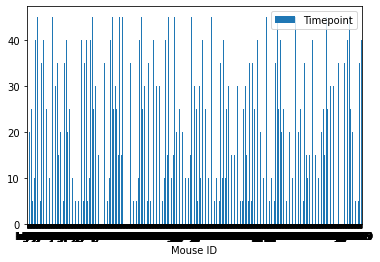

In [99]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar = merge_df.plot.bar(x='Mouse ID', y='Timepoint', rot=0)
bar


<BarContainer object of 1893 artists>

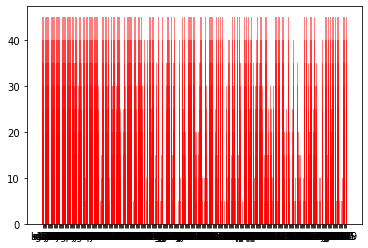

In [100]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
time = merge_df['Timepoint']
mice = merge_df['Mouse ID']
plt.bar(mice, time, color='r', alpha=0.5, align="center")

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie = merge_df.plot.pie(x='Male', y='Female')
pie

KeyError: 'Female'

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
amount = [125, 124]
colors = ["Blue", "Red"]
plt.pie(amount, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
data_2 = {'Name':['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol'],
        'Final Tumor Volume':[45, 21, 33, 28,]}
df2 = pd.DataFrame(data_2)
df2

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
x_limit = 50
x_axis = np.arange(0, x_limit, 1)
plt.scatter(x_axis, df2, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
  

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
x_limit = 50
x_axis = np.arange(0, x_limit, 1)
plt.scatter(x_axis, merge_df, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = np.arange(45, 21, 0.1)
sin = np.sin(x_axis)
cos = np.cos(x_axis)
plt.hlines(45, 21, 10, alpha=0.25)

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_limit = 50
x_axis = np.arange(0, x_limit, 1)
plt.scatter(x_axis, merge_df, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

## Correlation and Regression

In [74]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and tumor volume is {round(merge_df(Tumor Volume (mm3), Weight (g)	)[0],2)}")


SyntaxError: invalid syntax (<fstring>, line 1)